Graph fraction of agents conforming to platform's opinion against level of platform bias

In [4]:
import json
import matplotlib.pyplot as plt

file = 'data/{}-vs-polarisation/data-b{}-p0.5-c0.1-{}1.json'

platform_data = []
rec_data = []

for b in [0, 0.25, 0.5, 0.75]:
	with open(file.format('platform', b, 'rec')) as f:
		platform_data.append(json.load(f)['data'])

	with open(file.format('rec', b, 'platform')) as f:
		rec_data.append(json.load(f)['data'])
	

# data0['data']

In [6]:
def get_data(data):
	xs = []
	ys = []
	for key, val in data.items():
		xs.append(float(key))
		y = []
		for v in val:
			y.append(float(v[1] if v[0] == 1 else v[2]))
		ys.append(sum(y) / len(y))
	return xs, ys

In [13]:
def plot(data, xlabel):
	xs = []
	ys = []

	for d in data:
		x, y = get_data(d)
		xs.append(x)
		ys.append(y)

	for i, b in enumerate([0, 0.25, 0.5, 0.75]):
		plt.plot(xs[i], ys[i], label=f'b={b}')

	plt.legend()
	plt.xlabel(xlabel)
	plt.ylabel('Average fraction conforming to platform')

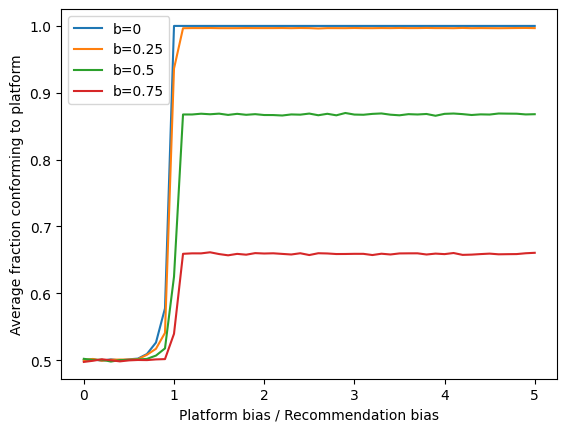

In [14]:
plot(platform_data, 'Platform bias / Recommendation bias')

In [15]:
plot(rec_data, 'Recommendation bias / Platform bias')

TypeError: plot() takes 1 positional argument but 2 were given